# Bayesian Analysis and Exercises

This is a notebook exploring Bayesian Analysis exercises, often coming from the Think Bayes textbook, but others that I have developed on my own or found from other sources. <br />
Please use the bayesian library of classes that comes with this notebook for most exercises.

References:
- Downey, Allen B. Think Bayes. O'Reilly Publishing

To Do:
- Add odds ratio form - how to include this?
- Coin flip problem - hypothesis test
- 2D problem - paintball
- Paintball with biased shooter

## Libraries

In [1]:
import sys

import numpy as np
import pandas as pd

import scipy.stats as sps

import bayesian.bayesian as bayes

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('classic')
%matplotlib inline

# Autoreload imports
# sets up auto reloading of modified .py modules
import autoreload
%load_ext autoreload
%autoreload 2 

## Cookie Problem

Problem Statement: You have two jars of cookies: one has 30 vanilla cookes and 10 chocolate cookies, the second has 20 of each.  You pick a cookie out of a random jar and get a vanilla cookie.  What is the probability that it came from each jar?
- This problem introduces Bayesian concepts in a simple way. before expanding to more hypotheses and complex likelihood functions.
- Here, we use a uniform prior because we have no expectations or previous beliefs about which jar the cookie would come from.
- We see that picking a vanilla cookie increases the probability it came from Bowl 1, since it contains a higher ratio of vanilla to chocolate compared to Bowl 2.
- You can play around with different orders of 'V' and 'C' cookie picking (altering dataCookie) to see how different choices change the posterior probabilities.

Hypotheses:  [1 2]
Prior:  [ 0.5  0.5]
Data:  ['V']
1 iterations completed!
Current Posterior:  [ 0.6  0.4]


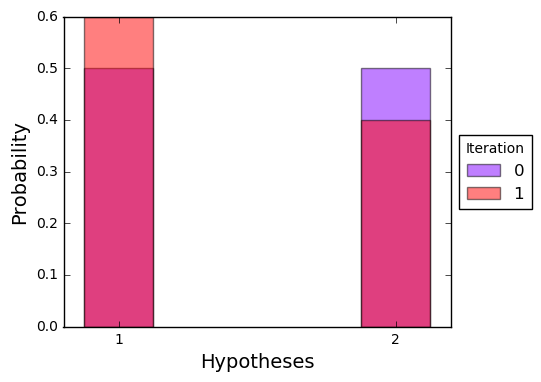

In [2]:
# 1) Hypothesis representation - each bowl
hyCookie = np.array([1, 2]) # Bowl 1 and Bowl 2

# 1b) Give proportion of vanilla cookies in each bowl
prCookie = np.array([3/4, 1/2])

# 2) Provide data for each iteration:
#---'V' or 'C' for vanilla or chocolate
dataCookie = np.array(['V'])

# 3) Create Bayesian object with chosen prior
#----uniform because have no preconceived belief
bCookie = bayes.BayesCookie(hyCookie, prCookie, priorName='uniform')

# Check hypotheses and prior
print("Hypotheses: ", bCookie.hypotheses)
print("Prior: ", bCookie.prior)
print("Data: ", dataCookie)

# Perform single iteration
bCookie.iterate(dataCookie)
print("Current Posterior: ", bCookie.current)
bCookie.plot_posteriors(plotType='bar')

As a first Bayesian problem, it is easiest to understand with just two bowls.  But we can generalize to 3, 4, or more bowls, as long as we enter the corresponding proportion of vanilla cookies for each (extending prCookie).  We can also simulate multiple iterations of pulling cookies out of the bowl by increasing the length of our data array.  Notice how, at the end, we have high probability we're not picking from Bowl 3, but we aren't yet sure of the other 4.

C:\Users\Jonathan\Documents\Python Scripts\Bayesian Analysis Training\bayesian\bayesian.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  ((minHyp-2/(maxHyp-minHyp))/(maxHyp-self.peak))*maxHyp+0.1)
C:\Users\Jonathan\Documents\Python Scripts\Bayesian Analysis Training\bayesian\bayesian.py:66: RuntimeWarning: invalid value encountered in subtract
  ((minHyp-2/(maxHyp-minHyp))/(maxHyp-self.peak))*maxHyp+0.1)


Hypotheses:  [1 2 3 4 5]
Prior:  [ 0.2  0.2  0.2  0.2  0.2]
Data:  ['V' 'V' 'C' 'V']
4 iterations completed!
Current Posterior:  [ 0.31087209  0.1842205   0.00503728  0.26985424  0.2300159 ]


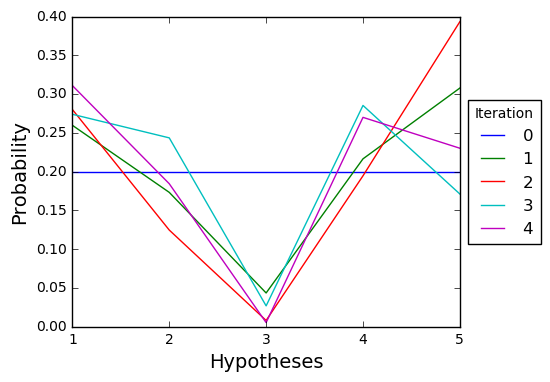

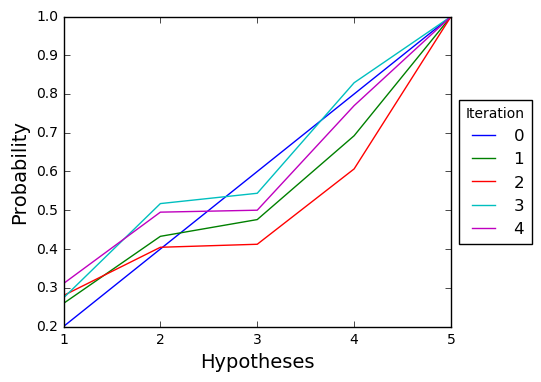

In [3]:
# 1) Hypothesis representation - each bowl
hyCookie = np.array([1, 2, 3, 4, 5]) # Bowls 1 through 5

# 1b) Give proportion of vanilla cookies in each bowl
prCookie = np.array([3/4, 1/2, 1/8, 5/8, 8/9])

# 2) Provide data for each iteration:
#---'V' or 'C' for vanilla or chocolate
dataCookie = np.array(['V', 'V', 'C', 'V'])

# 3) Create Bayesian object with chosen prior
#----uniform because have no preconceived belief
bCookie = bayes.BayesCookie(hyCookie, prCookie, priorName='uniform')

# Check hypotheses and prior
print("Hypotheses: ", bCookie.hypotheses)
print("Prior: ", bCookie.prior)
print("Data: ", dataCookie)

# Perform iterations
bCookie.iterate(dataCookie)
print("Current Posterior: ", bCookie.current)
bCookie.plot_posteriors(plotType='line')

# You can also plot the cumulative distribution function (cdf)
bCookie.plot_cdf(distType='posterior', plotType='line')

## M&M Problem

Problem Statement: Before 1995, M&M bags contained 0% blue, 30% brown, 20% yellow, 20% red, 10% green, 10% orange, and 10% tan.  After 1995, Mars, Inc. changed the colors to 24% blue, 13% brown, 14% yellow, 13% red, 20% green, 16% orange, 0% tan, and 13% brown.  Let's say you have one bag from each era.  From Bag 1, you pull a yellow M&M, and from Bag 2 you pull a green M&M.  What is the probability that the yellow came from a 1994 bag (and hence the green came from a 1996 bag?)
- This problem will use a similar setup as the cookie problem, but now we have two datapoints - one from each bag.
- It can be a little tricky to set up the hypotheses for this case.  Hypothesis 1 is that the yellow came from 1994 and the green came from 1996.  Hypothesis 2 is that the yellow came from 1996 and the green came from 1994.  So each hypothesis takes into account data from both bags.

Hypotheses:  [1994 1996]
Prior:  [ 0.5  0.5]
Data:  [('Ye', 'Gr'), ('Bl', 'Re')]
2 iterations completed!
Current Posterior:  [ 0.  1.]


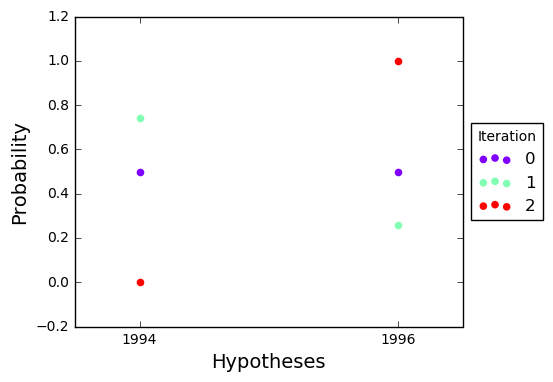

In [4]:
# 1) Hypothesis representation - each b
# Here, the first element is the hypothesis that the yellow M&M came from 1994
hyMM = np.array([1994, 1996]) # Bag 1 and Bag 2

# 2) Provide data for each iteration:
#---Here, each datapoint is a tuple, the pair of M&Ms picked from each bag
#---Notice, if you pick a Blue M&M in one bag, the probabilities go to 1/0
dataMM = [('Ye', 'Gr'), ('Bl', 'Re')]

# 3) Create Bayesian object with chosen prior
#----uniform because have no preconceived belief
bMM = bayes.BayesMandM(hyMM, priorName='uniform')

# Check hypotheses and prior
print("Hypotheses: ", bMM.hypotheses)
print("Prior: ", bMM.prior)
print("Data: ", dataMM)

# Perform single iteration
bMM.iterate(dataMM)
print("Current Posterior: ", bMM.current)
bMM.plot_posteriors(plotType='point')

## Monty Hall Problem

Problem Statement: This is a classic problem to show how intuition can often run counter to results from Bayesian analysis.  Imagine you are on a game show where you have a choice of 3 doors.  Behind one is a new car, nothing is behind the other two.  Once you pick a door (let's call it DOor 1), the host can randomly choose one of the other two doors (Doors 2 and 3) to open.  Let's call the door the host chooses to open Door 2.  Then, you are given a choice if you want to switch from A to the other remaining door.  What does Bayesian analysis tell you to do? <br />
<br />
Hint: be careful about setting up your data and likelihood!  The data actually includes two pieces of information.

Hypotheses:  [1 2 3]
Prior:  [ 0.33333333  0.33333333  0.33333333]
Data:  [[1 2]]
1 iterations completed!


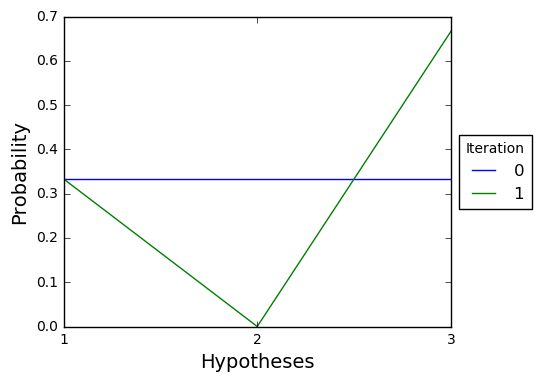

In [8]:
# 1) Provide representation of hypotheses - each of the three doors
hyMonty = np.array([1, 2, 3])

# 2) Provide data given to you
# -A) You have chosen Door 1
# -B) The host has opened Door 2
# This information is entered as a tuple, A being the first, B being the second
dataMonty = np.array([(1, 2)])

# 3) Create Bayesian object with chosen prior
bMonty = bayes.BayesMonty(hyMonty, priorName='uniform')

# Check hypotheses and prior
print("Hypotheses: ", bMonty.hypotheses)
print("Prior: ", bMonty.prior)
print("Data: ", dataMonty)

# Perform several iterations
bMonty.iterate(dataMonty)
bMonty.plot_posteriors('line')

Notice that, after provided the data about the door chosen by the contestant the door opened by the host, Bayesian thinking indicates the contestant should always switch to Door 3, since it now has double the chance of hiding the car behind it!

## Dice Problem

Problem Statement: Imagine there are five dice in a bag (4-,6-,8-,10-,12-, and 20-sided) and you roll a random, unkonwn one X number of times.  What is the probability that it is each of the five types of die?
- This problem uses an inverse likelihood function that appears in many other problems (like the locomotive below).
- Here again, we use a uniform prior because we don't have any previous expectation about there being nonuniform probabilities for picking different types of dice.
- However, we now have six hypotheses, and we can see how more data makes us more confident over time with more iterations.

Hypotheses:  [ 4  6  8 10 12 20]
Prior:  [ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]
Data:  [6 8 7 8 8 3]
6 iterations completed!


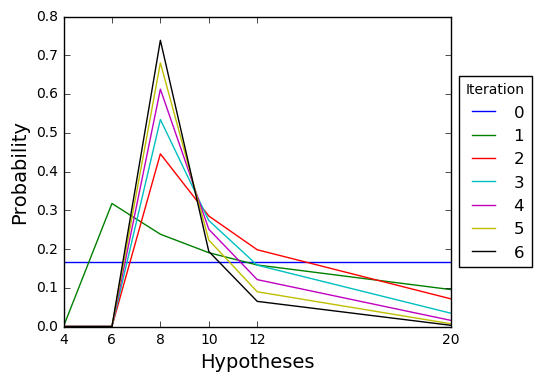

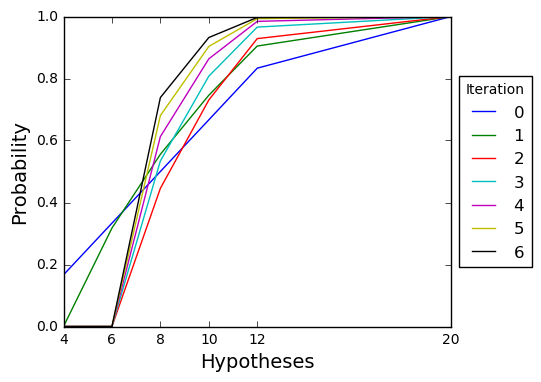

In [9]:
# 1) Provide representation of hypotheses - each type of dice
hyDice = np.array([4, 6, 8, 10, 12, 20])

# 2) Provide data from roll for each iteration
dataDice = np.array([6, 8, 7, 8, 8, 3])

# 3) Create Bayesian object with chosen prior
bDice = bayes.BayesInverse(hyDice, priorName='uniform')

# Check hypotheses and prior
print("Hypotheses: ", bDice.hypotheses)
print("Prior: ", bDice.prior)
print("Data: ", dataDice)

# Perform several iterations
bDice.iterate(dataDice)
bDice.plot_posteriors()
bDice.plot_cdf()

## Locomotive Problem

### Single Locomotive

Problem Statement: Imagine there are is a single train company using a railway that can use up to N possible trains (N must be provided as the limit of the hypotheses).  Each train is number sequentially up to the maximum value.  If you see a sequence of numbers of trains come by, what is the expected value of the number of trains owned by the company?
- This problem uses an inverse likelihood function that is identical to the dice problem.
- Since this problem is asking about expected values, we can use credible intervals and descriptive statistics to describe the difference between most probable and expected values.

1 iterations completed!


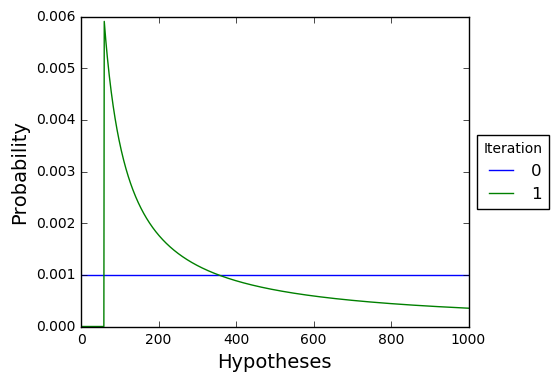

In [118]:
# 1) Provide hypotheses
hyLoco = np.arange(1, 1001, 1)

# 2) Provide iterative input data
dataLoco = [60]

# 3) Create Bayesian object with desired prior
bLoco = bayes.BayesInverse(hyLoco, 'uniform')

# Perform Bayesian updates and plot
bLoco.iterate(dataLoco)
bLoco.plot_posteriors()

### Credible Interval

Since the posterior distribution gives us probabilities of each hypothesis can be true, it's helpful to look at an interval across the hypotheses that would give us the expected value.  If we look at any one hypothesis, the probability is quite small, so this interval gives us a credible range of that expected value, hence it's name.  This package has a method for any Bayes object, called credible_interval (CI), that can calculate the CI for the prior, current, or entire set of posteriors across iterations.  The default calculates a 95% credible interval range, which indicates that there is a 95% probability that the actual value falls within these values.

In [119]:
# Calculate the credible interval for the locomotive problem
bLoco.credible_interval('posterior')

[(25, 975), (64, 932)]

Notice that, for the uniform prior, the interval is huge!  However, observing a No. 60 train car doesn't help much; we're still quite uncertain.  What if we see a few more cars in that range?

4 iterations completed!


[(25, 975), (64, 932), (61, 717), (70, 403), (81, 273), (81, 202)]

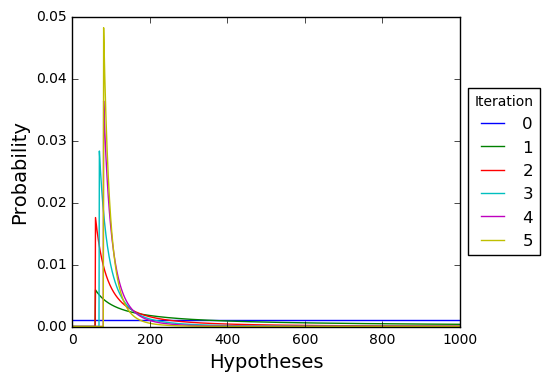

In [120]:
# Provide iterative input data
dataLoco = [55, 70, 81, 63]

# Perform Bayesian updates and plot
bLoco.iterate(dataLoco)
bLoco.plot_posteriors()
bLoco.credible_interval('posterior')

Notice that, after the No. 63 car is seen, our credible interval is now between 81 and 202, significantly better.  This indicates how accumulating more data can begin to narrow down expected values of the hypothesis.

 ### Different Priors

Up to this point, we've been using a uniform prior.  Now, we'd like to explore how choosing different priors affects the posterior distribution.  To start, let's redo a calculation with a few data points and a uniform prior.  We'll see below that, since all the data is roughly around 70, the final posterior distribution provides a CI between 76 and 256.

4 iterations completed!
[(76, 257)]


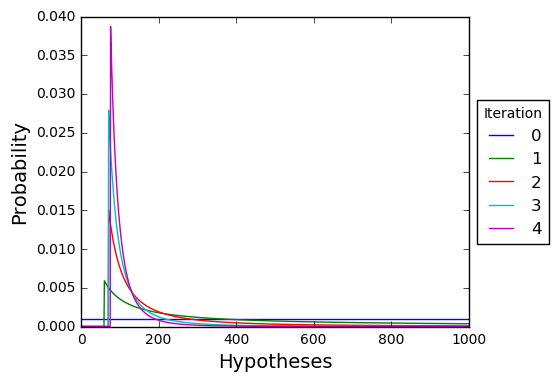

In [121]:
# Provide iterative input data
dataLocoPrTest = [60, 71, 55, 76]

# Create Bayesian object with uniform prior
bLocoUni = bayes.BayesInverse(hyLoco, 'uniform')

# Perform Bayesian updates and plot
bLocoUni.iterate(dataLocoPrTest)
bLocoUni.plot_posteriors()
print(bLocoUni.credible_interval())

Now, let's assume that we have some background information from an unreliable informant who knows nothing about railroads that the prior distribution should be peaked near 500.  This amounts to a triangular distribution for the prior.  What happens with the same input?

4 iterations completed!
[(77, 446)]


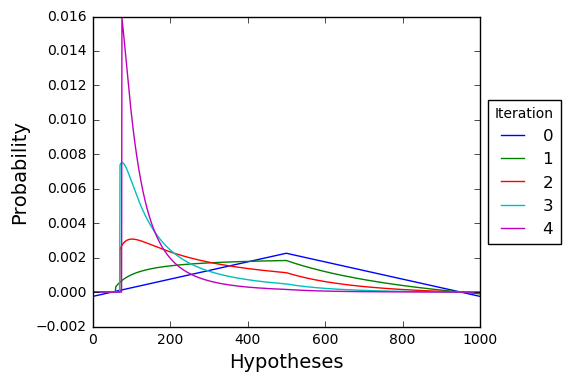

In [122]:
# Create Bayesian object with uniform prior
bLocoTri = bayes.BayesInverse(hyLoco, 'triangular', peak = 500)

# Perform Bayesian updates and plot
bLocoTri.iterate(dataLocoPrTest)
bLocoTri.plot_posteriors()
print(bLocoTri.credible_interval())

From the plot above, we can see that, by the fourth car we see, we can only predict that there is a 95% probability that there are between 77 and 445 cars, a much wider uncertainty than with the uniform prior.  So sometimes no knowledge is better than erroneous assumptions about the prior distribution. <br/>
<br/>
Now, what if we talk to a train expert who knows that the prior distribution could, to a general approximation, exponentially decay from lower values?  Let's try again with an exponential prior.

4 iterations completed!
[(3, 369), (61, 310), (71, 247), (71, 196), (76, 172)]


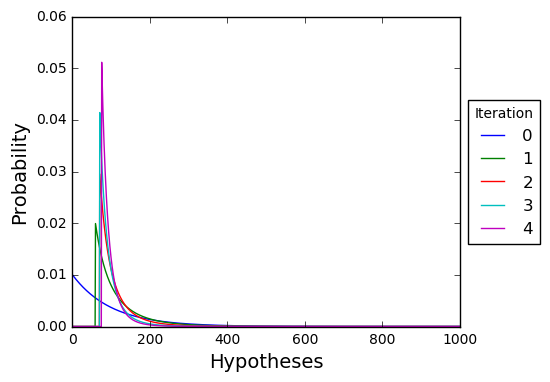

In [123]:
# Create Bayesian object with uniform prior
bLocoExp = bayes.BayesInverse(hyLoco, 'exponential', alpha=100)

# Perform Bayesian updates and plot
bLocoExp.iterate(dataLocoPrTest)
bLocoExp.plot_posteriors()
print(bLocoExp.credible_interval(distType='posterior'))

Here, we can see that by the 4th iteration the 95% CI is now between 76 and 172, even better than the uniform prior!  So having a prior that's roughly close to what you expect the result to be helps to converge quickly with more certainty, even with scarce data. <br/>
<br/>
Finally, let's see what happens with different priors if you have LOTS of data.  I'll randomly generate 15 numbers between 50 and 75 as our input data, but I'll use that terrible triangular prior as a starting point.

15 iterations completed!
[(73, 99)]
15 iterations completed!
[(74, 96)]


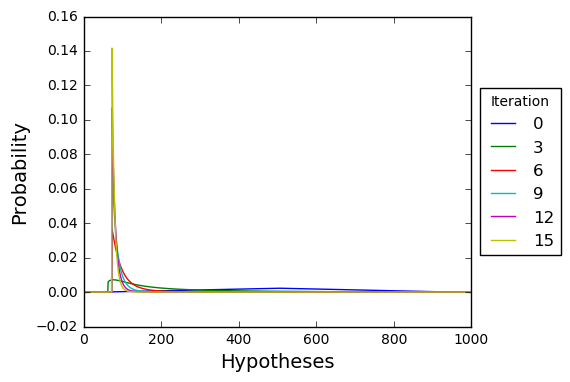

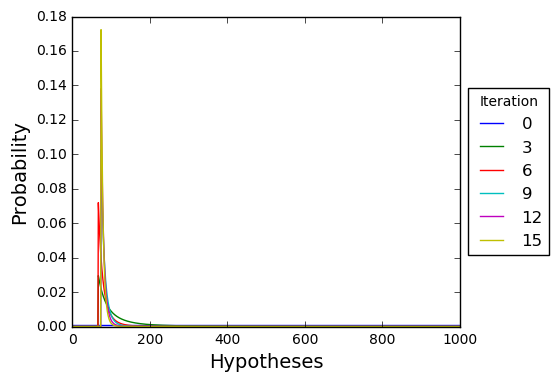

In [124]:
# Create Bayesian object with uniform prior
bLocoTri2 = bayes.BayesInverse(hyLoco, 'triangular', peak=500)

# Perform Bayesian updates and plot
bLocoTri2.iterate(np.random.randint(50, 75, 15))
bLocoTri2.plot_posteriors(plotEvery=3)
print(bLocoTri2.credible_interval(distType='current'))

# Create Bayesian object with uniform prior
bLocoUni2 = bayes.BayesInverse(hyLoco, 'uniform')

# Perform Bayesian updates and plot
bLocoUni2.iterate(np.random.randint(50, 75, 15))
bLocoUni2.plot_posteriors(plotEvery=3)
print(bLocoUni2.credible_interval(distType='current'))

So even in this case, with a poorly determined prior, only 15 data points are needed to recover a good 95% CI that almost exactly matches that using a uniform prior.  This is mainly because the data was all clustered between 50 and 75, so the algorithm quickly adapts and creates a narrow distribution.  But the general point remains that, with enough data, any prior will be 'swamped' and converge to the same posterior distribution.

## The Coin Toss, Bernoulli Processes, and Hypothesis Testing

Let's say your friend gives you a coin that she claims is unfair because, if spun on its edge, it does not fall with heads or tails up with equal probability.  She claims she knows it is unfair because she spun it 111 times and it came up heads on 61 of the spins.  Is she correct in stating that the coin is unfair? <br />

That question is impossible to answer exactly, but we can provide insight into whether this data gives evidence that the coin is unfair or not, and test a hypothesis that the coin is fair using a probability threshold.  We'll see both these cases below.

To do this exercise, we'll use a new likelihood function for the coin flip process, called BayesBinomial.  The series of coin flips is one example of a Bernoulli example, which is any sequence of of events with a binary result (0 or 1), each with a consistent probability of occurrence.  The sum of these Bernoulli probability distributions gives a binomial distribution, as we'll see below.

Hypotheses:  [   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.]
Prior:  [ 0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.

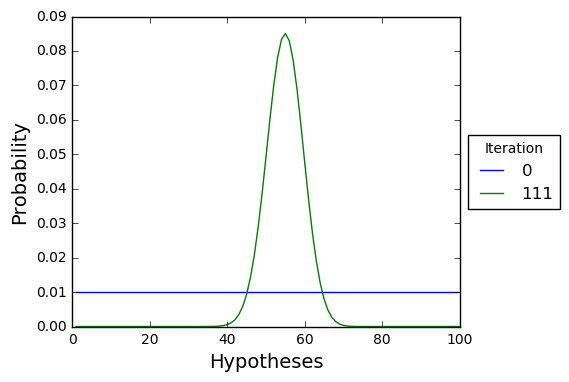

In [2]:
# 1) Provide representation of hypotheses
# Here, the hypotheses are the percent of times heads comes up
hyCoin = np.linspace(1,100,100)

# 2) Provide data from roll for each iteration
# Heads: 1, Tails: 0
dataCoin = np.ones(111) # create 111-sized array of ones
dataCoin[61:] = 0 # make 50 of them 0 (tails)

# 3) Create Bayesian object with chosen prior
bCoin = bayes.BayesBinomial(hyCoin, priorName='uniform')

# Check hypotheses and prior
print("Hypotheses: ", bCoin.hypotheses)
print("Prior: ", bCoin.prior)
print("Data: ", dataCoin)

# Perform several iterations
bCoin.iterate(dataCoin)
bCoin.plot_posteriors('line', plotEvery=111)
print('Mean: ', np.argmax(bCoin.current)+1)


I've ued the 'plotEvery' parameter in the plot_posterior method to only plot the prior and final posterior distributions.  You can see from our trials that we end up with a maximum probability at 55%, indicating it's most likely that, based on the evidence provided to us, that the coin turns up heads 55 percent of the time. <br />

At first, that sounds like an unfair coin!  But remember, this is based on a finite set of trials, and there's a probability distribution associated with this estimate, as shown above. 

### Hypothesis Testing

One method of hypothesis testing is to set a certain credible interval limit and determine whether the value related to our hypothesis falls within that range.  For example, in this case our null hypothesis is that the coin is fair and thus should provide a 50% chance of either head or tails.  To reject this null hypothesis, we would need sufficient evidence that the actual probability of heads or tails is not 50%. <br />

Let's use a 95% credible interval (originally introduced for the locomotive problem) as a test case.

In [3]:
print('95% CI: ', bCoin.credible_interval(distType='current'))

95% CI:  [(46.0, 64.0)]


In this case, there is a 95% probability that the coin will come up heads between 46-64% of the time.  Since 50% falls within that range, we can conclude that this data provides evidence supporting the null hypothesis that the coin is fair. <br />

The problem with this method is that our credible interval is arbitrary.  What if we only cared about an 60% probability?

In [9]:
print('80% CI: ', bCoin.credible_interval(distType='current', interval=(0.20,0.80)))

80% CI:  [(51.0, 59.0)]


Now, the credibility interval provides data suggesting that we reject the null hypothesis, and that the coin is unfair.  So our conclusions depend on the level of uncertainty we are comfortable with. <br />

Typically, we want to be at least 95% certain of a parameter value; but in many cases, we should look for 99% or great certainty.  Often, researchers talk about these in terms of sigmas, or standard deviations, relative to a normal distribution.

Another method of hypothesis testing and determining whether data supports a hypothesis or not is to use the Bayes Factor.  The Bayes Factor is relevant if we have two alternatives - the coin is fair or it is not.  Then, we take the ratio of the likelihood for each case across the entire probability distribution, weighting the probability of each result.  In this case, the hypothesis that the coin is far is 0.5 times the probability of 0.5 occurring:

In [44]:
# Weighted average for fair-coin hypothesis
bfFair = bCoin.current[49] * (bCoin.hypotheses[49])
print(bfFair)

# Weighted value for not-fair-coin hypothesis
hypNotFair = np.delete(bCoin.hypotheses, 49)
probNotFair = np.delete(bCoin.current, 49)
bfNotFair = (hypNotFair*probNotFair).mean()

print(bfFair, bfNotFair)
print("Bayes Factor: ", bfNotFair/bfFair)

2.46331286539
2.46331286539 0.529332765372
Bayes Factor:  0.214886534638


A Bayes Factor less than 1 indicates that the evidence is not in favor of the hypothesis corresponding to the numberator of the fraction.  So here, the evidence does not provide evidence supporting the not-fair hypothesis.  This matches our conclusions from looking at a credible interval with a fairly high certainty (>95%) window. <br />

Even if the Bayes Factor were greater 1, there is subjectivity about what size truly indicates strong evidence. Typically, a Bayes Factor greater than at least 10 is required to suggest strong evidence in favor of a hypothesis

## Bayesian Analysis in Two Dimensions: Paintball!

This example is again taken from Downey's book and an exercise at the end of one of his chapters.